In [3]:
import sys
sys.path.append('../../MembraneQuant')
from membranequant import *
%matplotlib notebook

In [16]:
basepath = '/Users/blandt/Desktop/Data/PAR2 RING mutants experiment 2/Experiment'
paths = direcslist(basepath, 1)
conditions = [p.split('/')[-2].split('_')[1] for p in paths]

imgs = [load_image(p + '/af_corrected.tif') for p in paths]
imgs_flat = [load_image(p + '/af_corrected_flat.tif') for p in paths]
imgs_3channel = [load_image(p + '/af_corrected_3channel.tif') for p in paths]
imgs_3channel_flat = [load_image(p + '/af_corrected_3channel_flat.tif') for p in paths]

rois = [np.loadtxt(p + '/ROI_fit.txt') for p in paths]
cytbg = np.loadtxt('../T2A/cytbg.txt')

In [24]:
iq = ImageQuant(img=[i for i, c in zip(imgs, conditions) if c == 'nwg325'], cytbg=cytbg, 
                roi=[r for r, c in zip(rois, conditions) if c == 'nwg325'], uni_cyt=True, adaptive_membg=True, 
                batch_norm=False, descent_steps=500, rol_ave=5, lr=0.01, iterations=1, rotate=False,
                interp_type='cubic', roi_knots=20, save_training=True)
iq.run()

100%|██████████| 500/500 [00:58<00:00,  8.47it/s]


Time elapsed: 59.43 seconds 


<IPython.core.display.Javascript object>


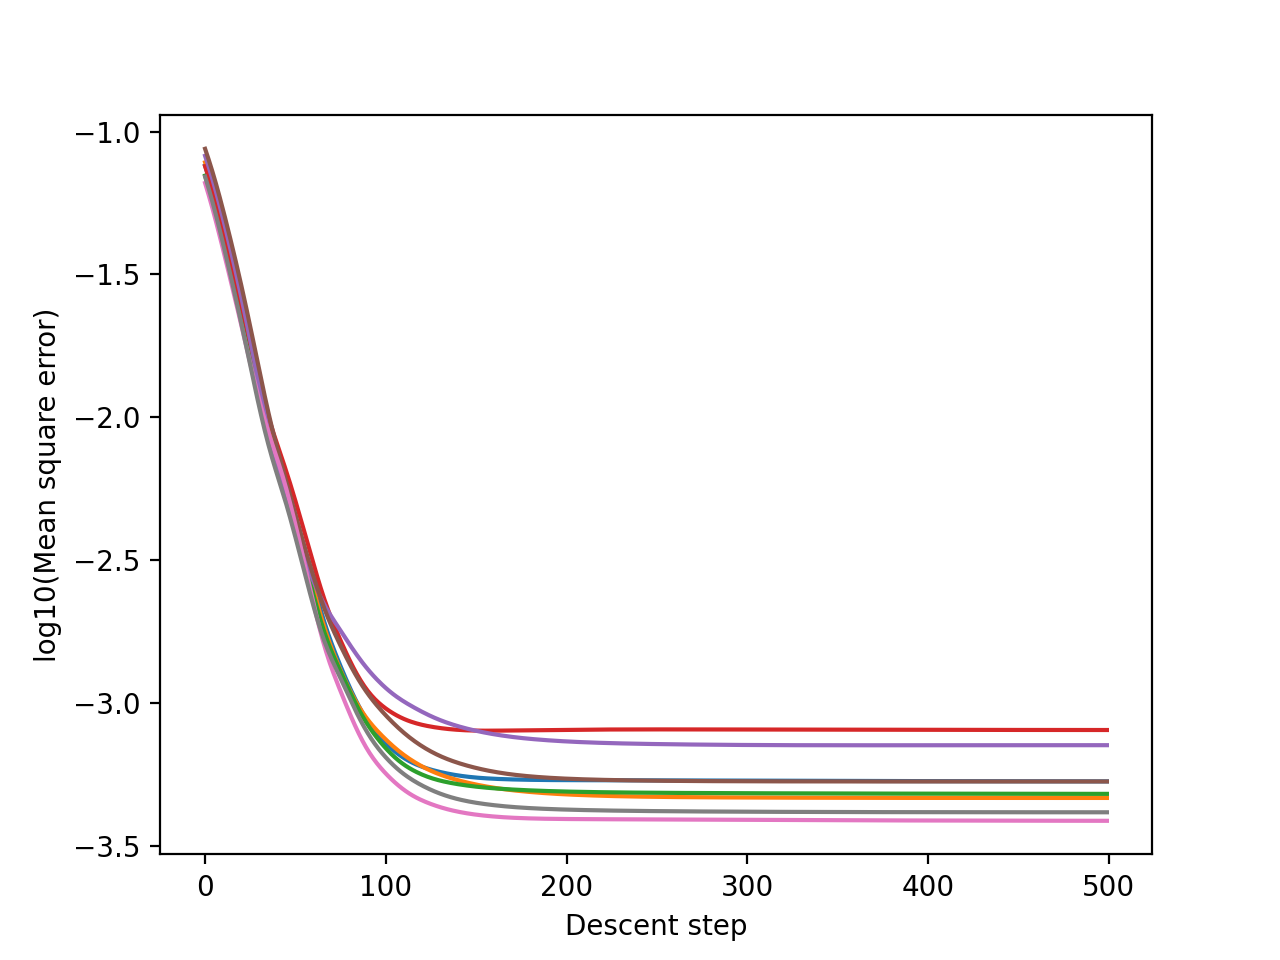

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Descent step', ylabel='log10(Mean square error)'>)

In [25]:
iq.plot_losses(log=True)

<IPython.core.display.Javascript object>


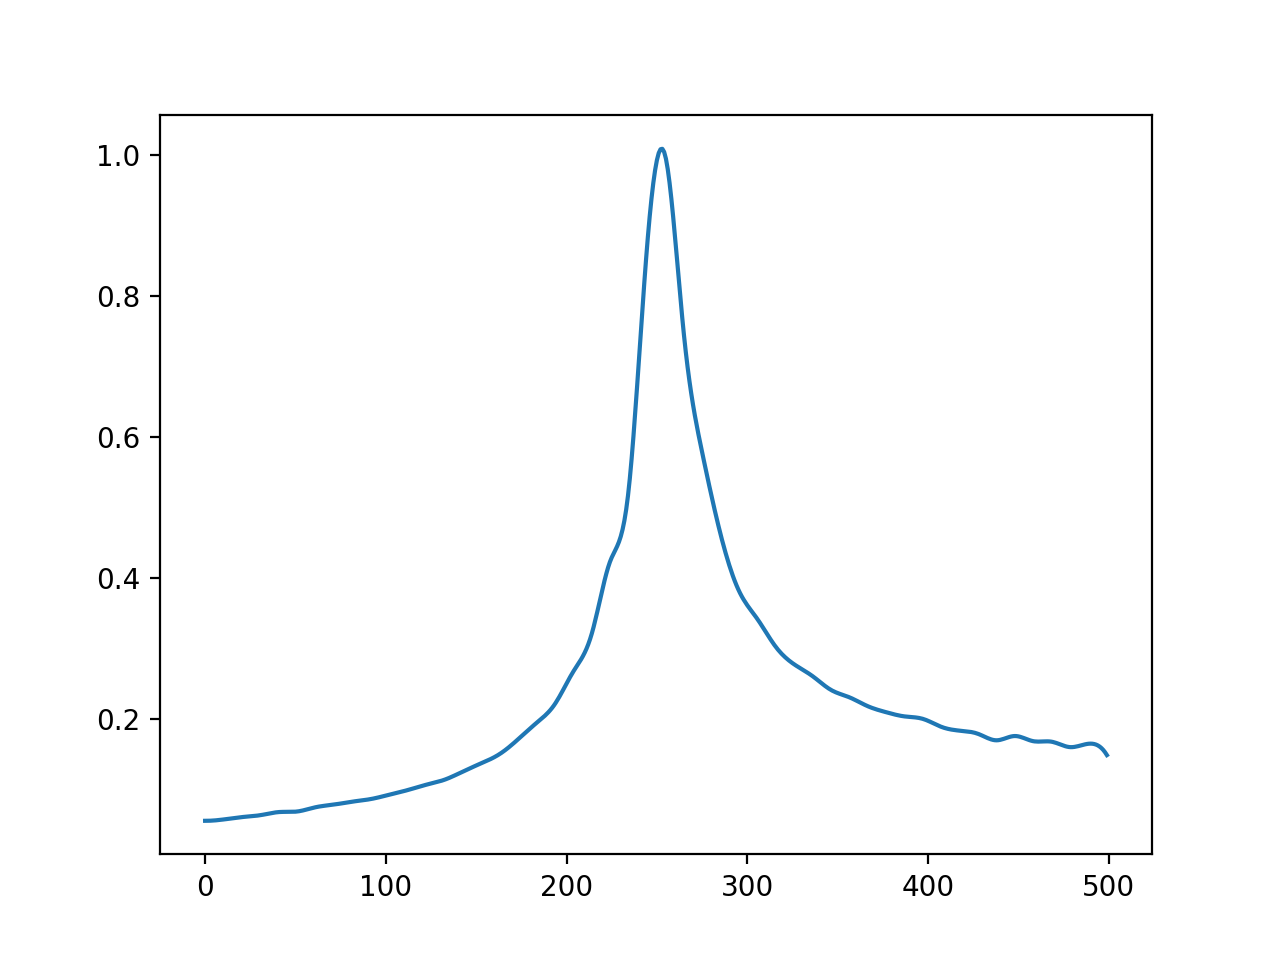

In [26]:
fig, ax = plt.subplots()
ax.plot(interp_1d_array(iq.membg / max(iq.membg), 500))

<IPython.core.display.Javascript object>


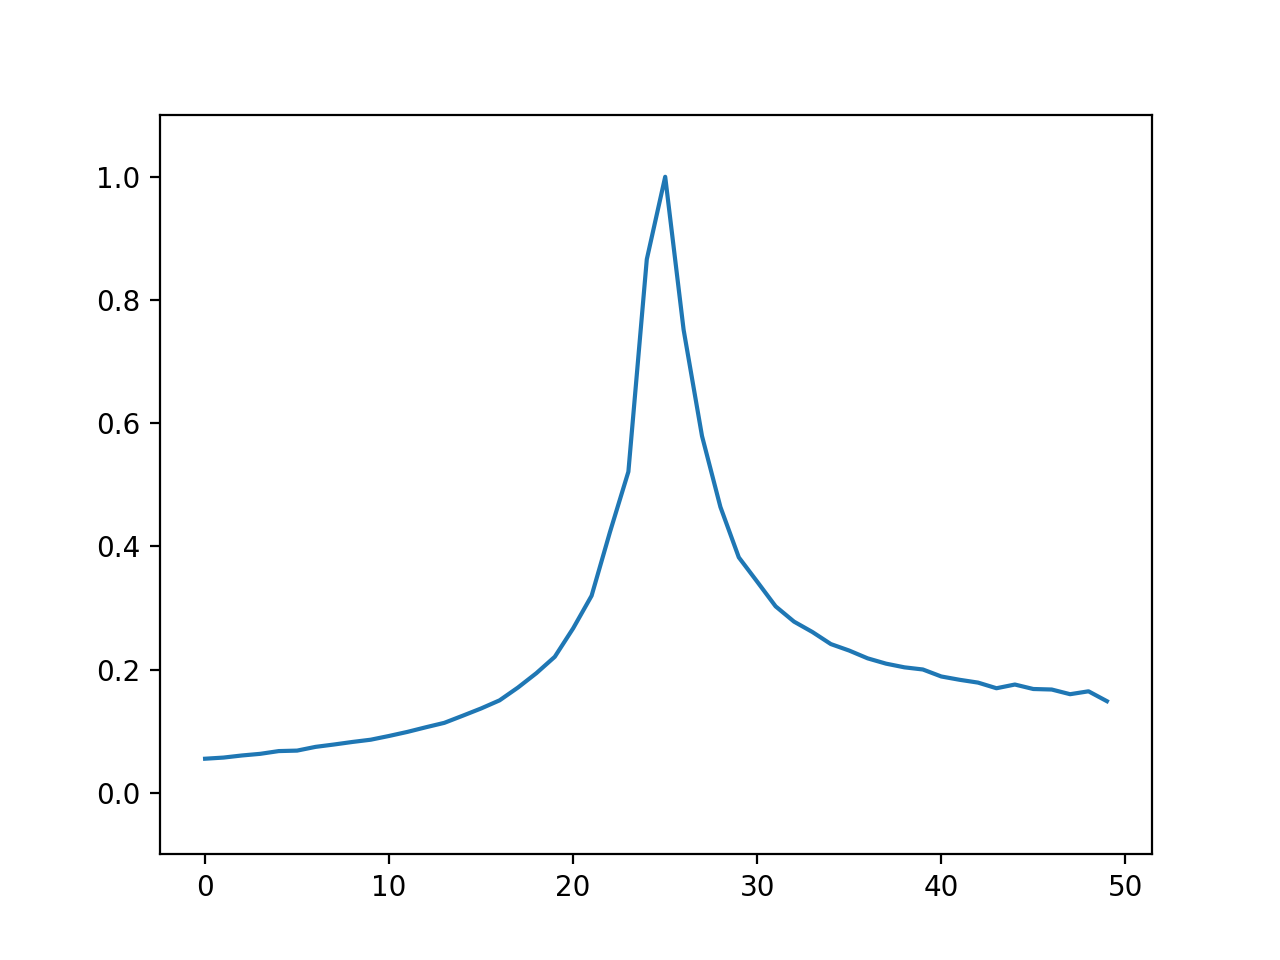

interactive(children=(IntSlider(value=0, description='i', max=499), Output()), _dom_classes=('widget-interact'…

In [27]:
import ipywidgets as widgets

fig, ax = plt.subplots()
@widgets.interact(i=(0, len(iq.saved_vars) - 1, 1))
def update(i=0): 
    ax.clear()
#     for j in iq3.saved_vars[i]['mems']:
#         ax.plot(j)
#     ax.set_ylim(-0.1, 1)
    ax.plot(iq.saved_vars[i]['membg'] / max(iq.saved_vars[i]['membg']))
    ax.set_ylim(-0.1, 1.1)

In [13]:
# np.savetxt('mem_profile.txt', iq.membg / max(iq.membg))